# Mathematical performance, socio economic index and mathematical anxiety and self-concept
# Comparative analysis between Canadian, French and US students 
## by Camille de Thé

## Investigation Overview

I chose to focus on the relative mathematical performance of students in the US, France and Canada. 

In this comparative analysis, i chose to investigate the potential link between the mathematical performance of students, their country and some specific variables. In this presentatin i will focus mainly on two specific attitudes toward mathematics namely mathematical anxiety and mathematical self-concept and the socio economic status of the family. 

## Dataset Overview

The Programme for International Student Assessment (PISA) is a worldwide study by the Organisation for Economic Co-operation and Development (OECD)  intended to evaluate educational systems by measuring 15-year-old school pupils' scholastic performance on mathematics, science, and reading. The dataset comes from PISA 2012 survey, which is the programme’s 5th survey. Around 510 000 students answered questionnaires to provide information about their background, school and learning experiences. 

As stated above we decided to focus on students in Canada, France and in the US with information on mathematical attitudes such as mathematical anxiety and self-concept. We deleted all rows with missing values. 

The final dataset consists in 8995 observations organized at the student level. Each row describes the learning context and outcomes of one student. The original dataset had 635 columns, our dataset has now only 14 columns. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
columns_select = ['CNT','ST01Q01','ST04Q01','SCMAT','ANXMAT','ANCCLSMAN','ANCCOGACT','ANCMTSUP','PV1MATH','PV2MATH','PV3MATH','PV4MATH','PV5MATH','MMINS','ESCS'
                ,'ISCEDO']
df=pd.read_csv(r"C:\Users\camil\OneDrive\STUDIES\DS\Udacity\Exploratory_analysis_PISA_2012\data\pisa2012.csv",usecols=columns_select)[columns_select]
df.loc[:,'math_perf']= 0.2*(df['PV1MATH']+df['PV2MATH']+df['PV3MATH']+df['PV4MATH']+df['PV5MATH'])
    

In [3]:
#delete the individual columns of math performance'
for col in df.columns : 
    if col[:2]=='PV' : 
        df=df.drop([col],axis=1)


In [4]:
#delete rows with missing values
df=df.dropna(axis=0,how='any')
#delete rows for countries outside France, Canada and US
list_countries = ['Canada','United States of America','France']
df_select = df[df.CNT.isin(list_countries)]

In [5]:
df_select['math_perf'].describe()

count    9083.000000
mean      510.191855
std        84.212467
min       226.522840
25%       449.610520
50%       510.445560
75%       569.878490
max       784.865280
Name: math_perf, dtype: float64

In [6]:
#Variables' renaming and transformation
df_select=df_select.rename(columns={'CNT':'country'})
df_select=df_select.rename(columns={'ST01Q01':'int_grade'})
df_select=df_select.rename(columns={'ANXMAT':'anxiety', 'ANCCLSMAN':'teacher_cl_mn', 'ANCCOGACT':'cog_act','ANCMTSUP':'teacher_sup','SCMAT':'self_conc'})
math_attitudes = ['anxiety', 'self_conc']
teaching_qual = ['teacher_cl_mn', 'cog_act','teacher_sup']
attitudes = math_attitudes + teaching_qual
color_base=sb.color_palette()[0]
df_select['socio_eco']=(df_select.ESCS+df_select.ESCS.min()+10)**2
df_select['math_study_hr'] = df_select['MMINS']/60
df_select=df_select.drop(['MMINS'],axis=1)
df_select=df_select.rename(columns={'ISCEDO':'prog_orient'})


In [7]:
df_select.groupby('country').describe()[['math_perf']]

math_perf                                    \
                             count        mean        std        min   
country                                                                
Canada                      6391.0  515.211026  82.275259  249.73516   
France                      1206.0  511.140589  88.081168  226.52284   
United States of America    1486.0  487.835396  85.667613  242.41314   

                                                                        
                                 25%        50%         75%        max  
country                                                                 
Canada                    455.997820  515.27498  572.877390  784.86528  
France                    447.877410  514.37919  576.148905  758.30346  
United States of America  428.189745  484.62377  547.678745  741.32260

## Distribution of mathematical performance

We can see that the assessed mathematical performance follows a normal distribution.
The average is 510 and the standard deviation equals 84. 

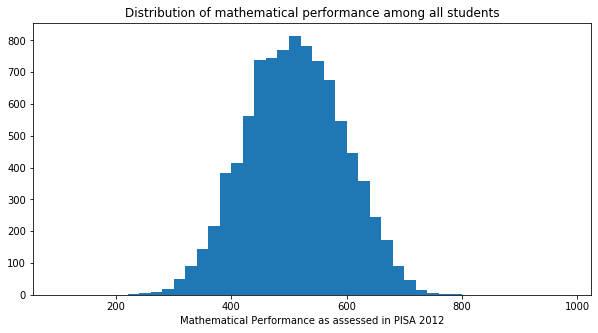

In [8]:
plt.figure(figsize=[10,5])
bin_edges=np.arange(100,1000,20);
plt.hist(data=df_select,x='math_perf',bins=bin_edges);
plt.title('Distribution of mathematical performance among all students');
plt.xlabel('Mathematical Performance as assessed in PISA 2012');



## Distribution of mathematical performance in the three countries

The median mathematical performance is around 515 in Canada and in France but is significantly lower in the US, around 488. 

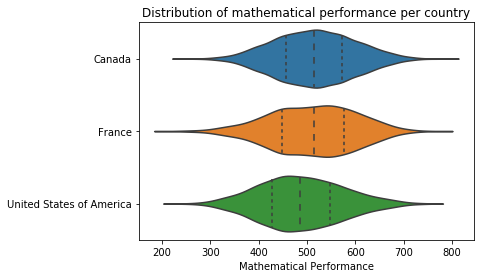

In [9]:
sb.violinplot(data=df_select,y='country',x='math_perf',inner='quartile');
plt.title('Distribution of mathematical performance per country');
plt.ylabel('');
plt.xlabel('Mathematical Performance');
plt.show()



In [10]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
df_select.groupby('country').describe()[['math_perf']]


math_perf                             
                             count mean std min 25% 50% 75% max
country                                                        
Canada                        6391  515  82 250 456 515 573 785
France                        1206  511  88 227 448 514 576 758
United States of America      1486  488  86 242 428 485 548 741

## Socio economic index

The initial variable 'ESCS' catpures the socio economic status of the family. It is built with 3 types of variables: the possessions of the family, the occupational status of the parents and their educational background. 
The left hand side histogram shows a left-skewed normal distribution of the variable. The mode is around 1. The mean and the median around -0.15. The right handside histogram shows the distribution of a new socio eco index built with a transformation from the former one (a constant has been added and the square has then been taken) to remove the skewness.

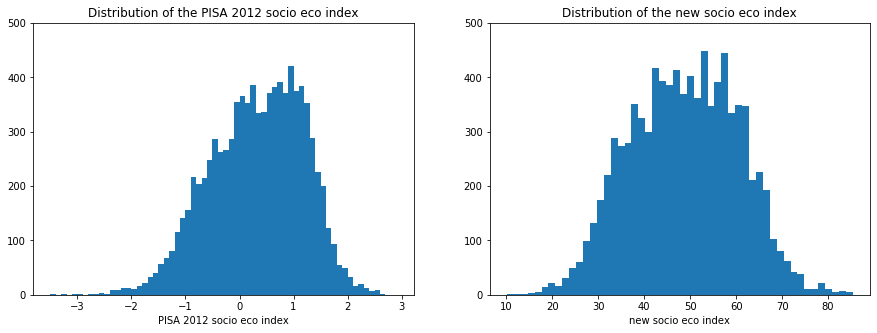

In [11]:
plt.figure(figsize=[15,5]);

plt.subplot(1,2,1);

bin_egdes=np.arange(-3.5,3,0.1)
plt.hist(data=df_select,x='ESCS',color=color_base,bins=bin_egdes);
plt.xlabel('PISA 2012 socio eco index')
plt.ylim(0,500);
plt.title('Distribution of the PISA 2012 socio eco index')
plt.subplot(1,2,2);

plt.hist(data=df_select,x='socio_eco',color=color_base,bins=50);
plt.xlabel('new socio eco index')
plt.title('Distribution of the new socio eco index')
plt.ylim(0,500);

## Matrix of correlation of all our variables

Mathematical performance displays moderate correlation levels first with our two variables describing students's attitude toward mathematics (between 0.4 and 0.5). 

Then the socio economic level of parents is the third variable that shows moderate correlation with math performance (correlation coefficient equals 0.33). 

Last some weak correlations with math performance could be reported: international grade of the students, all variables characterizing the quality of mathematical teaching, and to a lower extent the number of hours spent studying math at school. 

In [12]:
df_select2=df_select.rename(columns={'int_grade':'international grade',
                                     'self_conc' : 'mathematical self-concept', 
                                     'anxiety' :'mathematical anxiety',
                                     'teacher_cl_mn' : 'math teacher class mngt',
                                     'cog_act' : 'cognitive activation in math class',
                                      'teacher_sup' : 'teacher support',
                                    'math_perf' : 'mathematical performance',
                                    'socio_eco' : 'new socio eco index',
                                     'math_study_hr' : 'hrs/wk of in class math study'
                                    })


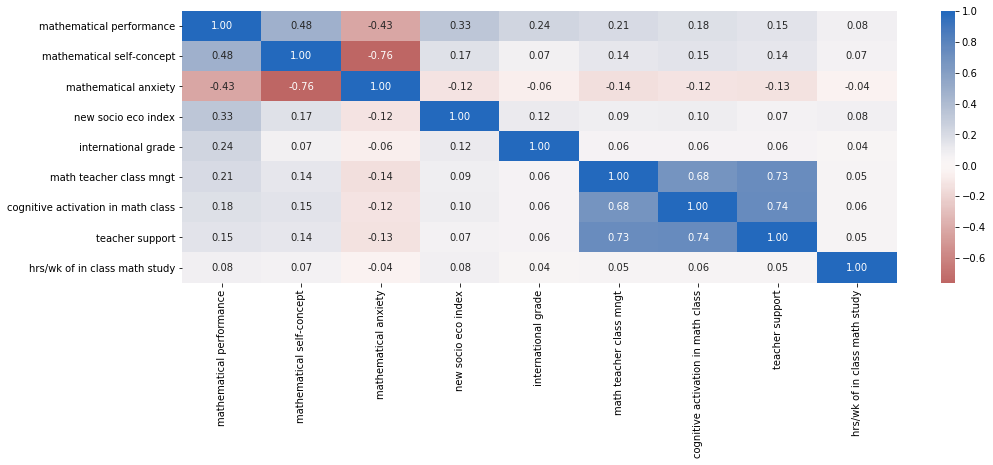

In [13]:
plt.figure(figsize = (16,5));
sb.heatmap(df_select2[[ 'mathematical performance', 'mathematical self-concept', 'mathematical anxiety',
                       'new socio eco index','international grade',                                                                             'math teacher class mngt',
                                     'cognitive activation in math class',
                                     'teacher support',                                    
                                     'hrs/wk of in class math study']].corr(),annot=True,fmt='.2f',cmap='vlag_r',center=0);



## Mathematical anxiety and self-concept, association with math performance

It's really interesting to note the strength of the association between math performance and math anxiety and math self concept (students' own assessment of their math skills). It may show that students are really good at evaluating their math skills. It may also show that anxiety and mathematics might be for certain students a vicious circle: bad results could bring anxiety that may then become an emotional hurdle for math learning.


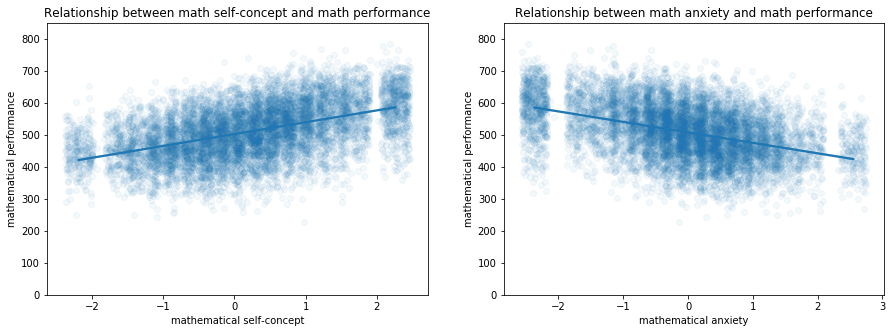

In [14]:
plt.figure(figsize=[15,5]);
plt.subplot(1,2,1);
sb.regplot(data=df_select2,x='mathematical self-concept', y='mathematical performance', scatter_kws={'alpha':0.05},x_jitter=0.2);
plt.ylim(0,850);
plt.title('Relationship between math self-concept and math performance');

plt.subplot(1,2,2);
sb.regplot(data=df_select2,x='mathematical anxiety', y='mathematical performance', scatter_kws={'alpha':0.05},x_jitter=0.2);
plt.ylim(0,850);
plt.title('Relationship between math anxiety and math performance');


## Mathematical anxiety and self-concept per country

Despite better average results in mathematics, French students appear to suffer more from anxiety and display lower levels of mathematical self-concept.

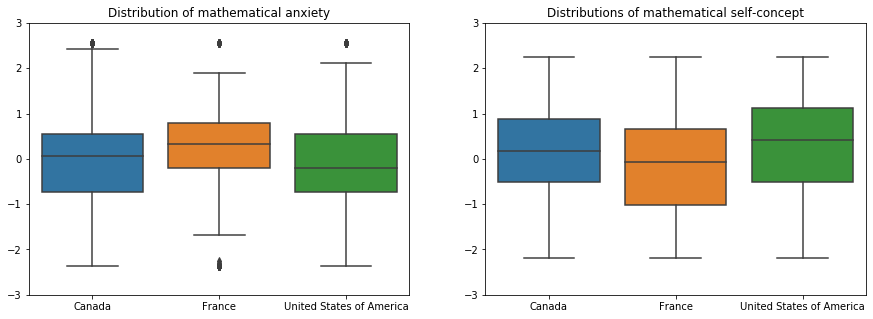

In [15]:
plt.figure(figsize=[15,5]);
plt.subplot(1,2,1);
sb.boxplot(data=df_select,x='country',y=math_attitudes[0]);
plt.title('Distribution of mathematical anxiety');
plt.xlabel('');
plt.ylabel('');
plt.ylim(-3,3);

plt.subplot(1,2,2);
sb.boxplot(data=df_select,x='country',y=math_attitudes[1]);
plt.title('Distributions of mathematical self-concept');
plt.xlabel('');
plt.ylabel('');
plt.ylim(-3,3);


## Mathematical self-concept and mathematical performance per country

The discrepancies between average mathematical self-concept and performance across the three countries is an reason to investigate potential national differencies in the relationship between those two variables. 
The four graphs below show that despite these disparities the relationships between math self concept and math performance appear to be similar across the three countries.

These preliminary results would benefit from a deeper statistical analysis: where does this cultural bias come from? Are specific teaching pratices efficient to mitigate anxiety and low self-concept? Does anxiety have any impact on math outcomes or is it the other way round? 



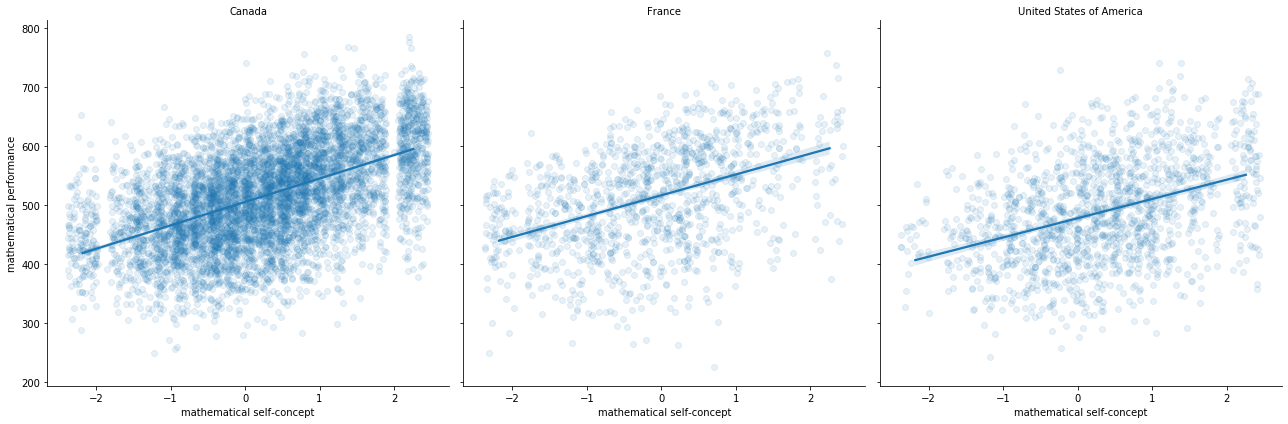

In [16]:
g=sb.FacetGrid(data=df_select2,col='country',height=6);
g.map(sb.regplot,'mathematical self-concept','mathematical performance',x_jitter=0.2,y_jitter=0.2,scatter_kws={'alpha':0.1})   ;
g.set_titles('{col_name}');

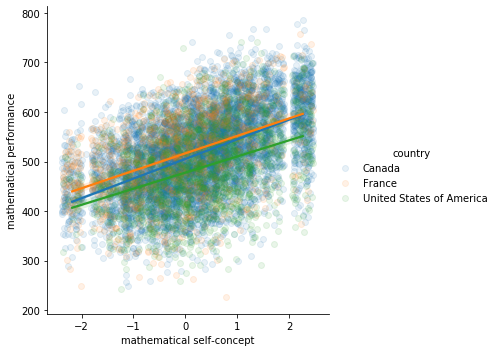

In [17]:
g=sb.FacetGrid(data=df_select2,hue='country',height=5);
#plt.title('ESCS')
g.map(sb.regplot,'mathematical self-concept','mathematical performance',x_jitter=0.2, scatter_kws={'alpha':0.1})  ; 
g.add_legend();

## Socio economic index and mathematical performance
The link between the socio economic status and the math performance appears quite strong. The association could reflect many things: parents with higher socio economic index could afford to enroll their children in better schools, are probably better educated and can provide directly or indirectly (through after school programs) help and assistance to foster the mathematical outcomes of their children. Parents from high socio economic background may also put the emphasis on the importance of succeding in mathematics and foster their children to be good in this field, providing external motivation.  


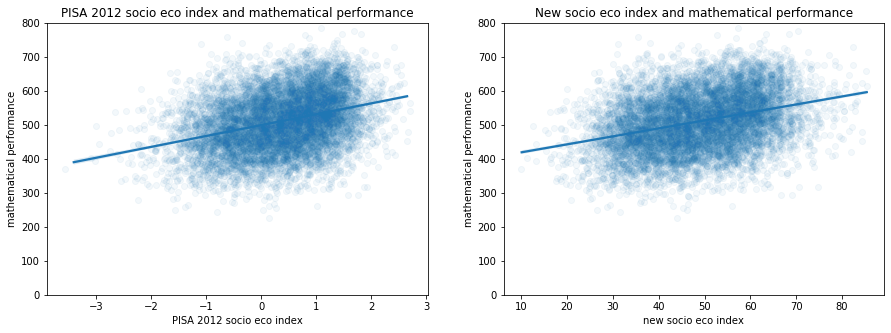

In [18]:
#'mathematical performance', 'mathematical self-concept', 'mathematical anxiety', 'new socio eco index'
plt.figure(figsize=[15,5])

plt.subplot(1,2,1);
sb.regplot(data=df_select2,x='ESCS',y='mathematical performance',scatter_kws={'alpha':0.05},x_jitter=0.2);
plt.title('PISA 2012 socio eco index and mathematical performance');
plt.xlabel('PISA 2012 socio eco index')
plt.ylim(0,800)
plt.subplot(1,2,2)
plt.title('New socio eco index and mathematical performance');
sb.regplot(data=df_select2,x='new socio eco index',y='mathematical performance',scatter_kws={'alpha':0.05},x_jitter=0.2)
plt.ylim(0,800);

## Socio economic index and mathematical performance per country

Those three plots show something very interesting. While the relationships between the socio economic status of parents and mathematical performance is positive in each country, it appears that the slope of French graph appears to be much steeper than the slopes of the graph for the two other countries. It may mean that the French school system is less efficient to overturn social discrepancies. 


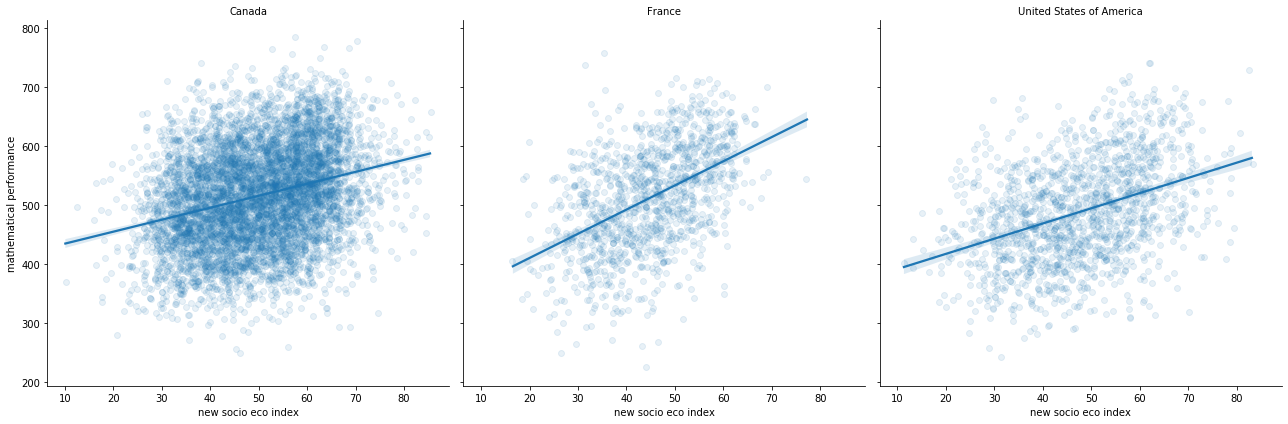

In [19]:
g=sb.FacetGrid(data=df_select2,col='country',height=6);
g.map(sb.regplot,'new socio eco index','mathematical performance',x_jitter=0.2,y_jitter=0.2,scatter_kws={'alpha':0.1}) ;  
g.set_titles('{col_name}');
#plt.title('new socio index and mathematical performance')